# Lecture 5 — From Linear Models to Neural Networks: Building Multi-Layer Perceptrons from Scratch

Welcome to **Lecture 5** of *Practical Introduction to Machine Learning and Deep Learning*!  
This lecture is part of the **SAIR ML/DL Roadmap & Bootcamp**.

## 🌱 Why This Lecture Matters  

In previous lectures, we mastered **linear models**:
- ✅ Linear Regression (continuous outputs)
- ✅ Logistic Regression (binary classification)  
- ✅ Softmax Regression (multi-class classification)

But what if our data has **complex, non-linear patterns**? What if a simple straight line or plane can't separate our classes?

> *"Neural networks are just logistic regression repeated many times with non-linearities in between."*

## 📖 What You'll Learn

1. **The limitations of linear models**
2. **Biological inspiration for neural networks**
3. **Neuron: The fundamental building block**
4. **Activation functions: ReLU, Tanh, Sigmoid**
5. **Forward propagation through multiple layers**
6. **Backpropagation: The chain rule in action**
7. **Implementing Multi-Layer Perceptron (MLP) from scratch**
8. **Visualizing learning and decision boundaries**
9. **Comparing with sklearn's MLP**
10. **Real-world applications and next steps**

---

## 🧠 The Core Idea

**Linear Models:**  
$$\hat{y} = \sigma(\mathbf{X}\mathbf{W} + b)$$

**Neural Networks:**  
$$\hat{y} = \sigma_2(\mathbf{W}_2 \cdot \sigma_1(\mathbf{W}_1 \mathbf{X} + b_1) + b_2)$$

Where $\sigma_1$ and $\sigma_2$ are **non-linear activation functions** that enable the network to learn complex patterns.

💡 **Key Insight:** By stacking linear transformations with non-linearities, we can approximate any continuous function!

## Part 1: The Need for Non-Linearity

### Step 1️⃣ — Limitations of Linear Models

/tmp/ipykernel_919244/883751906.py:37: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_919244/883751906.py:37: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


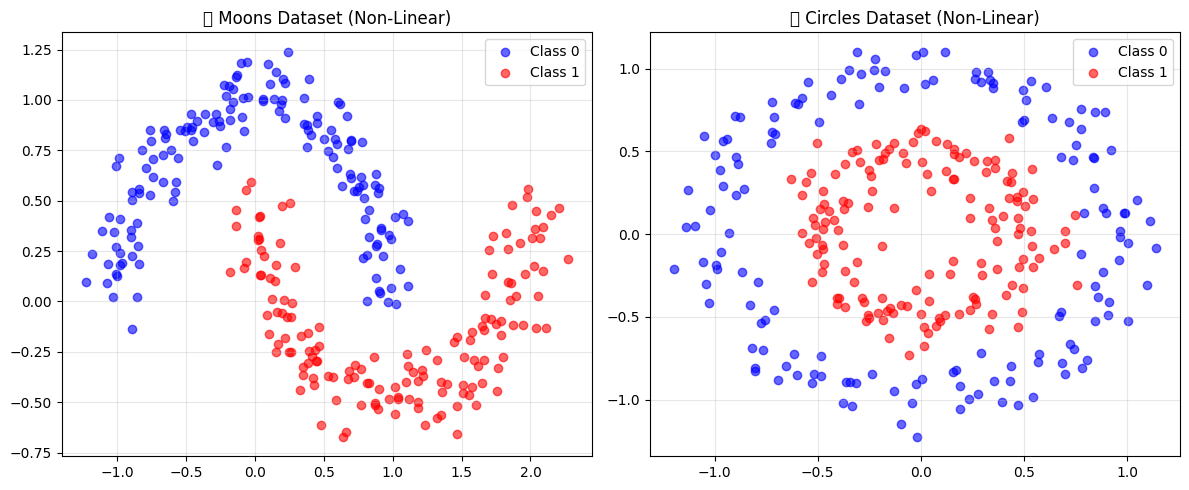

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles

# Create non-linearly separable datasets
np.random.seed(42)

# Moons dataset
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)
y_moons = y_moons.reshape(-1, 1)

# Circles dataset  
X_circles, y_circles = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
y_circles = y_circles.reshape(-1, 1)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Moons
axes[0].scatter(X_moons[y_moons.flatten() == 0, 0], X_moons[y_moons.flatten() == 0, 1], 
                color='blue', label='Class 0', alpha=0.6)
axes[0].scatter(X_moons[y_moons.flatten() == 1, 0], X_moons[y_moons.flatten() == 1, 1], 
                color='red', label='Class 1', alpha=0.6)
axes[0].set_title('🌙 Moons Dataset (Non-Linear)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Circles
axes[1].scatter(X_circles[y_circles.flatten() == 0, 0], X_circles[y_circles.flatten() == 0, 1], 
                color='blue', label='Class 0', alpha=0.6)
axes[1].scatter(X_circles[y_circles.flatten() == 1, 0], X_circles[y_circles.flatten() == 1, 1], 
                color='red', label='Class 1', alpha=0.6)
axes[1].set_title('⭕ Circles Dataset (Non-Linear)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 2️⃣ — Try Linear Model on Non-Linear Data

📊 Logistic Regression on Moons Dataset:
Accuracy: 86.67%


/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


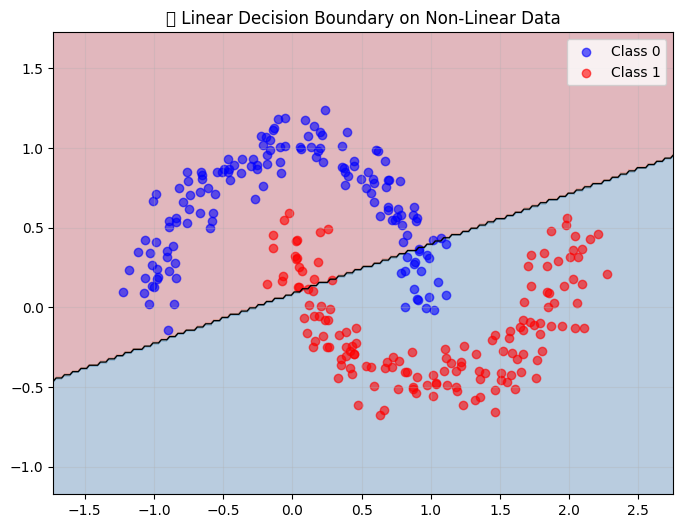

In [27]:
class LogisticRegression:
    def __init__(self, n_features, lr=0.01):
        """
        Initialize Logistic Regression model
        
        Args:
            n_features: number of input features
            lr: learning rate
        """
        self.W = np.random.randn(n_features, 1) * 0.01
        self.b = np.zeros((1, 1))
        self.lr = lr
        self.losses = []
        self.accuracies = []
    
    def sigmoid(self, z):
        """Sigmoid activation function"""
        # Clip to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def forward(self, X):
        """
        Forward pass: compute predictions
        
        Args:
            X: input features (m, n)
        
        Returns:
            predictions: probabilities (m, 1)
        """
        z = X @ self.W + self.b
        return self.sigmoid(z)
    
    def compute_loss(self, y_pred, y_true):
        """
        Compute Binary Cross-Entropy loss
        
        Args:
            y_pred: predicted probabilities (m, 1)
            y_true: true labels (m, 1)
        
        Returns:
            loss: scalar BCE loss
        """
        # Clip predictions to prevent log(0)
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        m = len(y_true)
        loss = -np.mean(
            y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
        )
        return loss
    
    def compute_accuracy(self, y_pred, y_true):
        """
        Compute classification accuracy
        
        Args:
            y_pred: predicted probabilities (m, 1)
            y_true: true labels (m, 1)
        
        Returns:
            accuracy: percentage of correct predictions
        """
        predictions = (y_pred >= 0.5).astype(int)
        return np.mean(predictions == y_true) * 100
    
    def backward(self, X, y_pred, y_true):
        """
        Compute gradients
        
        Args:
            X: input features (m, n)
            y_pred: predicted probabilities (m, 1)
            y_true: true labels (m, 1)
        
        Returns:
            dW: gradient w.r.t weights
            db: gradient w.r.t bias
        """
        m = len(y_true)
        dW = (1/m) * (X.T @ (y_pred - y_true))
        db = (1/m) * np.sum(y_pred - y_true)
        return dW, db
    
    def step(self, dW, db):
        """Update parameters"""
        self.W -= self.lr * dW
        self.b -= self.lr * db
    
    def fit(self, X, y, epochs=1000, verbose=True):
        """
        Train the model
        
        Args:
            X: training features (m, n)
            y: training labels (m, 1)
            epochs: number of training iterations
            verbose: whether to print progress
        """
        for i in range(epochs):
            # Forward pass
            y_pred = self.forward(X) # sigmoid(x@w + b)
            
            # Compute loss and accuracy
            loss = self.compute_loss(y_pred, y)
            acc = self.compute_accuracy(y_pred, y)
            
            self.losses.append(loss)
            self.accuracies.append(acc)
            
            # Backward pass
            dW, db = self.backward(X, y_pred, y)
            
            # Update parameters
            self.step(dW, db)
            
            if verbose and (i % 100 == 0 or i == epochs - 1):
                print(f"Epoch {i:4d} | Loss: {loss:.4f} | Accuracy: {acc:.2f}%")
    
    def predict(self, X):
        """
        Make predictions on new data
        
        Args:
            X: input features (m, n)
        
        Returns:
            predictions: binary predictions (m, 1)
        """
        y_pred = self.forward(X)
        return (y_pred >= 0.5).astype(int)
    
    def predict_proba(self, X):
        """
        Get probability predictions
        
        Args:
            X: input features (m, n)
        
        Returns:
            probabilities: predicted probabilities (m, 1)
        """
        return self.forward(X)
# Try logistic regression on moons dataset
linear_model = LogisticRegression(n_features=2, lr=0.1)
linear_model.fit(X_moons, y_moons, epochs=1000, verbose=False)

# Evaluate
y_pred = linear_model.predict(X_moons)
accuracy = linear_model.compute_accuracy(linear_model.forward(X_moons), y_moons)

print(f"📊 Logistic Regression on Moons Dataset:")
print(f"Accuracy: {accuracy:.2f}%")

# Plot decision boundary
def plot_decision_boundary_linear(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
    plt.contour(xx, yy, Z, colors='black', linewidths=1, levels=[0.5])
    
    plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], 
                color='blue', label='Class 0', alpha=0.6)
    plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], 
                color='red', label='Class 1', alpha=0.6)
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_decision_boundary_linear(linear_model, X_moons, y_moons, 
                            "❌ Linear Decision Boundary on Non-Linear Data")

### Step 3️⃣ — Biological Inspiration: The Neuron

/tmp/ipykernel_919244/1395492825.py:23: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


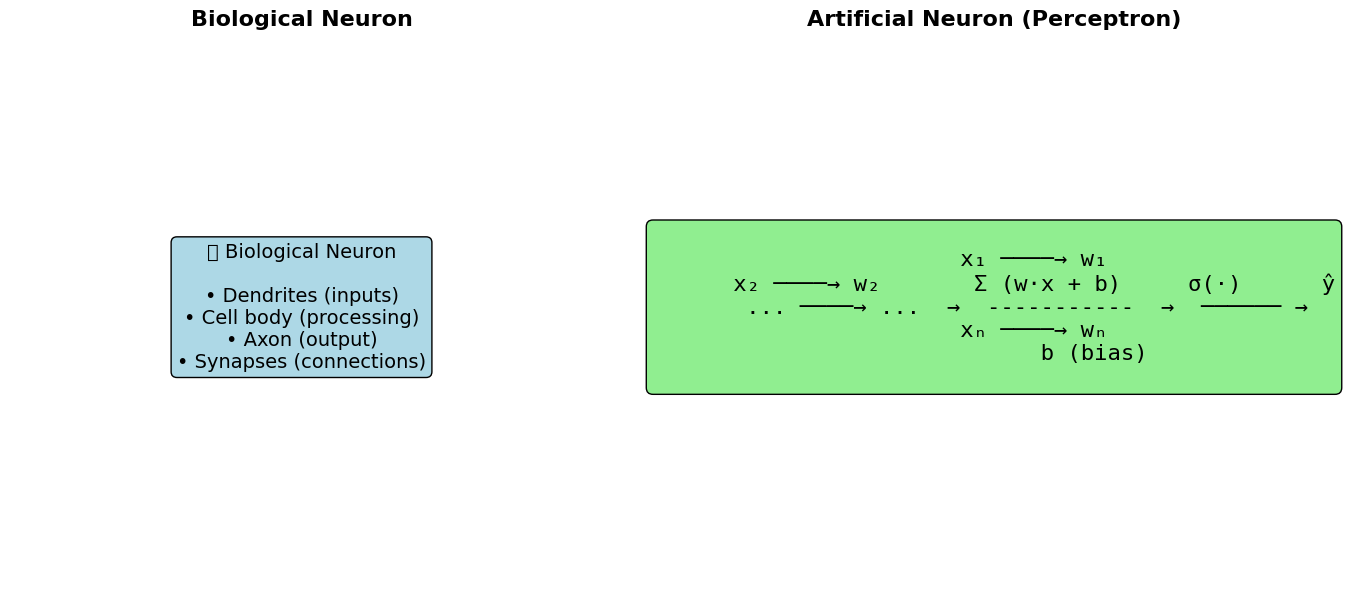

🔬 Key Analogy:
Dendrites → Input features (x₁, x₂, ..., xₙ)
Synapses → Weights (w₁, w₂, ..., wₙ)
Cell body → Summation + Activation
Axon → Output (ŷ)


In [28]:
# Visualize biological vs artificial neuron
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biological neuron
axes[0].text(0.5, 0.5, '🧠 Biological Neuron\n\n• Dendrites (inputs)\n• Cell body (processing)\n• Axon (output)\n• Synapses (connections)',
            ha='center', va='center', fontsize=14, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
axes[0].set_title('Biological Neuron', fontsize=16, weight='bold')
axes[0].axis('off')

# Artificial neuron
neuron_diagram = """
      x₁ ────→ w₁
      x₂ ────→ w₂       Σ (w⋅x + b)     σ(·)      ŷ
      ... ────→ ...  →  -----------  →  ────── → 
      xₙ ────→ wₙ
               b (bias)
"""
axes[1].text(0.5, 0.5, neuron_diagram, ha='center', va='center', fontsize=16, 
            fontfamily='monospace', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
axes[1].set_title('Artificial Neuron (Perceptron)', fontsize=16, weight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("🔬 Key Analogy:")
print("Dendrites → Input features (x₁, x₂, ..., xₙ)")
print("Synapses → Weights (w₁, w₂, ..., wₙ)")
print("Cell body → Summation + Activation")
print("Axon → Output (ŷ)")

### Step 4️⃣ — Activation Functions: Introducing Non-Linearity

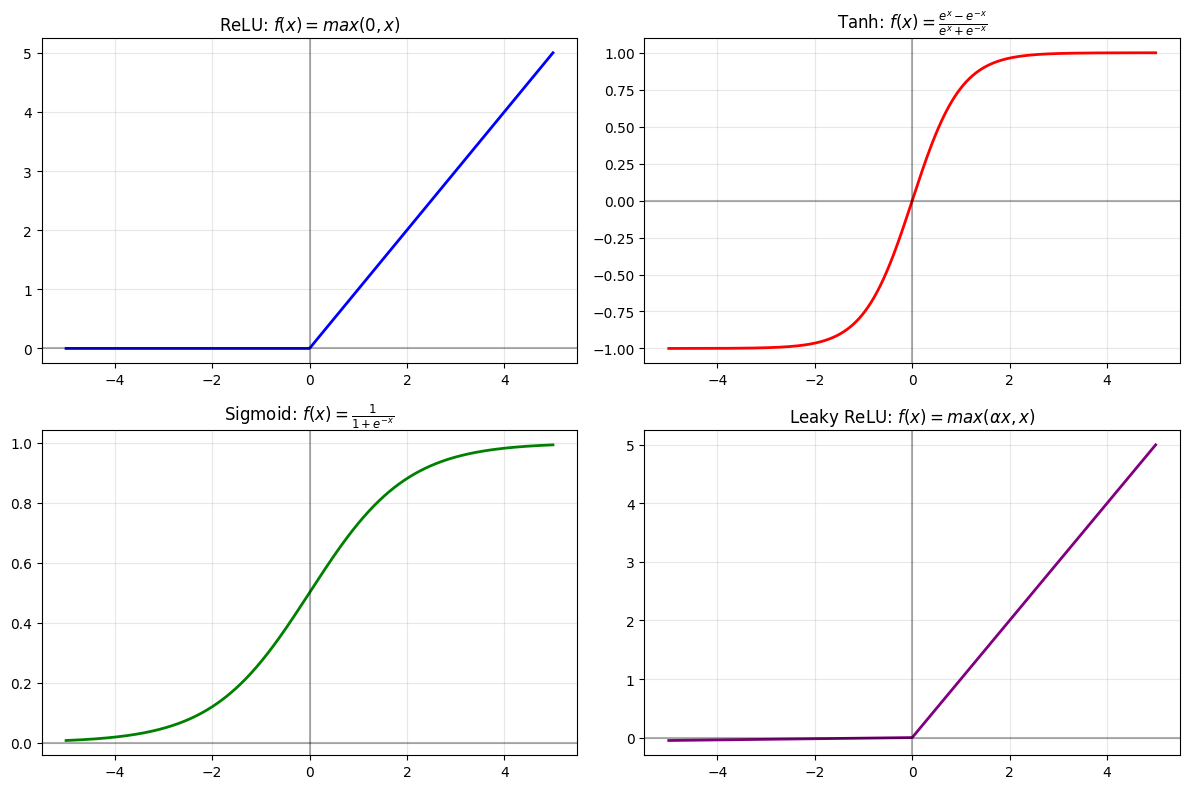

In [29]:
# Common activation functions
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Plot activation functions
x = np.linspace(-5, 5, 1000)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# ReLU
axes[0,0].plot(x, relu(x), 'b-', linewidth=2)
axes[0,0].set_title('ReLU: $f(x) = max(0, x)$')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0,0].axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Tanh
axes[0,1].plot(x, tanh(x), 'r-', linewidth=2)
axes[0,1].set_title('Tanh: $f(x) = \\frac{e^x - e^{-x}}{e^x + e^{-x}}$')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0,1].axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Sigmoid
axes[1,0].plot(x, sigmoid(x), 'g-', linewidth=2)
axes[1,0].set_title('Sigmoid: $f(x) = \\frac{1}{1 + e^{-x}}$')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1,0].axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Leaky ReLU
axes[1,1].plot(x, leaky_relu(x), 'purple', linewidth=2)
axes[1,1].set_title('Leaky ReLU: $f(x) = max(αx, x)$')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1,1].axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

### Step 5️⃣ — Derivatives of Activation Functions

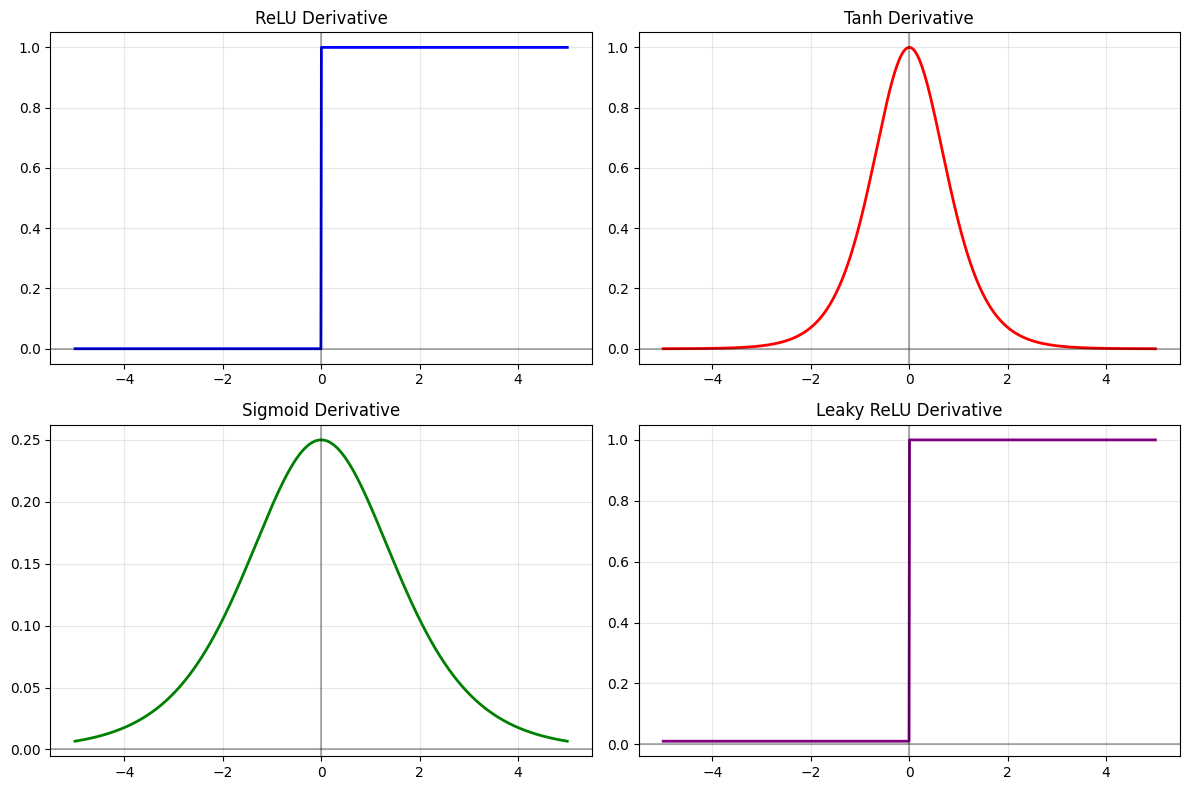

In [30]:
# Derivatives
def relu_derivative(x):
    return (x > 0).astype(float)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Plot derivatives
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# ReLU derivative
axes[0,0].plot(x, relu_derivative(x), 'b-', linewidth=2)
axes[0,0].set_title('ReLU Derivative')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0,0].axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Tanh derivative
axes[0,1].plot(x, tanh_derivative(x), 'r-', linewidth=2)
axes[0,1].set_title('Tanh Derivative')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0,1].axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Sigmoid derivative
axes[1,0].plot(x, sigmoid_derivative(x), 'g-', linewidth=2)
axes[1,0].set_title('Sigmoid Derivative')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1,0].axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Leaky ReLU derivative
axes[1,1].plot(x, leaky_relu_derivative(x), 'purple', linewidth=2)
axes[1,1].set_title('Leaky ReLU Derivative')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1,1].axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

### Step 6️⃣ — Why ReLU is Popular in Deep Learning

In [31]:
print("🧠 Why ReLU Dominates Deep Learning:")
print("\n✅ Advantages:")
print("• Non-saturating for positive values → no vanishing gradient")
print("• Computationally efficient (max operation)")
print("• Sparse activation → more efficient representations")
print("• Biological plausibility (similar to real neurons)")

print("\n⚠️ Challenges:")
print("• Dying ReLU problem (neurons can get stuck at 0)")
print("• Not zero-centered")

print("\n🔧 Solutions:")
print("• Leaky ReLU, Parametric ReLU, ELU variants")
print("• Proper weight initialization")
print("• Batch Normalization")

🧠 Why ReLU Dominates Deep Learning:

✅ Advantages:
• Non-saturating for positive values → no vanishing gradient
• Computationally efficient (max operation)
• Sparse activation → more efficient representations
• Biological plausibility (similar to real neurons)

⚠️ Challenges:
• Dying ReLU problem (neurons can get stuck at 0)
• Not zero-centered

🔧 Solutions:
• Leaky ReLU, Parametric ReLU, ELU variants
• Proper weight initialization
• Batch Normalization


## Part 2: Building Neural Networks from Scratch

### Step 7️⃣ — Single Layer → Multi-Layer Architecture

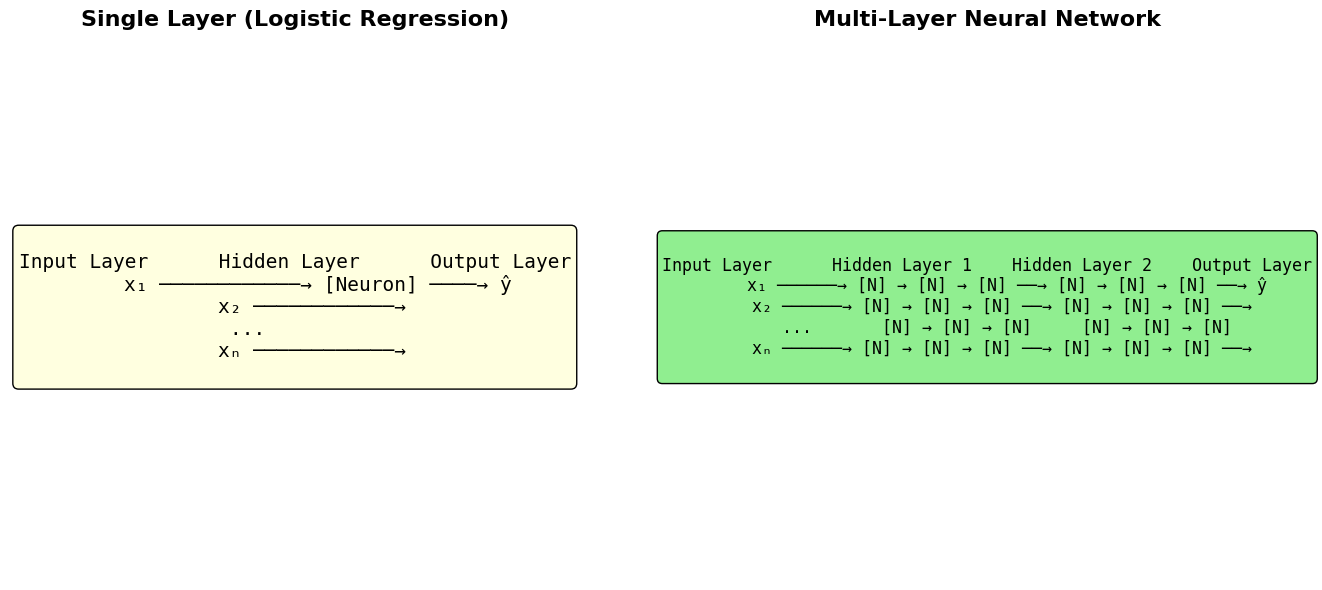

🚀 Key Insight:
Multiple layers allow the network to learn hierarchical features:
Layer 1: Simple features (edges, corners)
Layer 2: Complex features (shapes, patterns)
Layer 3: Very complex features (objects, concepts)


In [32]:
# Visualize network architectures
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Single layer (Logistic Regression)
single_layer = """
Input Layer      Hidden Layer      Output Layer
    x₁ ────────────→ [Neuron] ────→ ŷ
    x₂ ────────────→ 
    ...            
    xₙ ────────────→ 
"""
axes[0].text(0.5, 0.5, single_layer, ha='center', va='center', fontsize=14, 
            fontfamily='monospace', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
axes[0].set_title('Single Layer (Logistic Regression)', fontsize=16, weight='bold')
axes[0].axis('off')

# Multi-layer (Neural Network)
multi_layer = """
Input Layer      Hidden Layer 1    Hidden Layer 2    Output Layer
    x₁ ──────→ [N] → [N] → [N] ──→ [N] → [N] → [N] ──→ ŷ
    x₂ ──────→ [N] → [N] → [N] ──→ [N] → [N] → [N] ──→ 
    ...       [N] → [N] → [N]     [N] → [N] → [N]
    xₙ ──────→ [N] → [N] → [N] ──→ [N] → [N] → [N] ──→ 
"""
axes[1].text(0.5, 0.5, multi_layer, ha='center', va='center', fontsize=12, 
            fontfamily='monospace', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
axes[1].set_title('Multi-Layer Neural Network', fontsize=16, weight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("🚀 Key Insight:")
print("Multiple layers allow the network to learn hierarchical features:")
print("Layer 1: Simple features (edges, corners)")
print("Layer 2: Complex features (shapes, patterns)")  
print("Layer 3: Very complex features (objects, concepts)")

### Step 8️⃣ — Forward Propagation: Step-by-Step

In [33]:
# Manual forward propagation example
np.random.seed(42)

# Sample input
X_example = np.array([[1.0, 2.0]])  # 1 sample, 2 features

# Initialize weights and biases for a 2-layer network
# Architecture: 2 inputs → 3 hidden neurons → 1 output
W1 = np.random.randn(2, 3) * 0.1  # Input to hidden
b1 = np.zeros((1, 3))
W2 = np.random.randn(3, 1) * 0.1  # Hidden to output  
b2 = np.zeros((1, 1))

print("🔢 Forward Propagation Example:")
print(f"Input X: {X_example}")
print(f"W1 shape: {W1.shape}, b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}, b2 shape: {b2.shape}")

# Step 1: Input to hidden layer
z1 = X_example @ W1 + b1
print(f"\nStep 1 - Linear transformation (z1): {z1}")

# Step 2: Apply activation (ReLU)
a1 = relu(z1)
print(f"Step 2 - Activation (a1 = ReLU(z1)): {a1}")

# Step 3: Hidden to output layer
z2 = a1 @ W2 + b2
print(f"Step 3 - Linear transformation (z2): {z2}")

# Step 4: Output activation (sigmoid for binary classification)
y_pred = sigmoid(z2)
print(f"Step 4 - Output (ŷ = sigmoid(z2)): {y_pred}")

print(f"\n🎯 Final prediction: {y_pred[0,0]:.4f} (probability of class 1)")

🔢 Forward Propagation Example:
Input X: [[1. 2.]]
W1 shape: (2, 3), b1 shape: (1, 3)
W2 shape: (3, 1), b2 shape: (1, 1)

Step 1 - Linear transformation (z1): [[ 0.35427739 -0.06065711  0.01794146]]
Step 2 - Activation (a1 = ReLU(z1)): [[0.35427739 0.         0.01794146]]
Step 3 - Linear transformation (z2): [[0.05510563]]
Step 4 - Output (ŷ = sigmoid(z2)): [[0.51377292]]

🎯 Final prediction: 0.5138 (probability of class 1)


### Step 9️⃣ — The Chain Rule: Mathematical Foundation of Backpropagation

In [34]:
# Visualize computational graph
computational_graph = """
Forward Pass:
X → z₁ = XW₁ + b₁ → a₁ = σ(z₁) → z₂ = a₁W₂ + b₂ → ŷ = σ(z₂) → Loss

Backward Pass (Chain Rule):
∂Loss/∂W₂ = ∂Loss/∂ŷ · ∂ŷ/∂z₂ · ∂z₂/∂W₂
∂Loss/∂W₁ = ∂Loss/∂ŷ · ∂ŷ/∂z₂ · ∂z₂/∂a₁ · ∂a₁/∂z₁ · ∂z₁/∂W₁

Each step uses local gradients!
"""

print("🧮 Computational Graph & Chain Rule:")
print(computational_graph)

# Example chain rule calculation
print("\n📐 Example: Computing ∂Loss/∂W₁ step by step:")
steps = [
    "1. ∂Loss/∂ŷ = - (y/ŷ - (1-y)/(1-ŷ))",
    "2. ∂ŷ/∂z₂ = ŷ(1-ŷ)  (sigmoid derivative)",
    "3. ∂z₂/∂a₁ = W₂",
    "4. ∂a₁/∂z₁ = σ'(z₁)  (activation derivative)", 
    "5. ∂z₁/∂W₁ = X",
    "6. Multiply all: ∂Loss/∂W₁ = X · σ'(z₁) · W₂ · ŷ(1-ŷ) · (ŷ - y)"
]

for step in steps:
    print(step)

🧮 Computational Graph & Chain Rule:

Forward Pass:
X → z₁ = XW₁ + b₁ → a₁ = σ(z₁) → z₂ = a₁W₂ + b₂ → ŷ = σ(z₂) → Loss

Backward Pass (Chain Rule):
∂Loss/∂W₂ = ∂Loss/∂ŷ · ∂ŷ/∂z₂ · ∂z₂/∂W₂
∂Loss/∂W₁ = ∂Loss/∂ŷ · ∂ŷ/∂z₂ · ∂z₂/∂a₁ · ∂a₁/∂z₁ · ∂z₁/∂W₁

Each step uses local gradients!


📐 Example: Computing ∂Loss/∂W₁ step by step:
1. ∂Loss/∂ŷ = - (y/ŷ - (1-y)/(1-ŷ))
2. ∂ŷ/∂z₂ = ŷ(1-ŷ)  (sigmoid derivative)
3. ∂z₂/∂a₁ = W₂
4. ∂a₁/∂z₁ = σ'(z₁)  (activation derivative)
5. ∂z₁/∂W₁ = X
6. Multiply all: ∂Loss/∂W₁ = X · σ'(z₁) · W₂ · ŷ(1-ŷ) · (ŷ - y)


### Step 🔟 — Implementing Multi-Layer Perceptron (MLP)

In [36]:
class NeuralNetwork:
    def __init__(self, layer_sizes, activation='relu', learning_rate=0.01):
        """
        Initialize neural network
        
        Args:
            layer_sizes: list of layer sizes [input_size, hidden1_size, ..., output_size]
            activation: activation function ('relu', 'tanh', 'sigmoid')
            learning_rate: learning rate for gradient descent
        """
        self.layer_sizes = layer_sizes
        self.activation_name = activation
        self.lr = learning_rate
        self.losses = []
        self.accuracies = []
        
        # Initialize weights and biases
        self.weights = []
        self.biases = []
        
        for i in range(len(layer_sizes) - 1):
            # He initialization for ReLU, Xavier for tanh/sigmoid
            if activation == 'relu':
                scale = np.sqrt(2.0 / layer_sizes[i])
            else:
                scale = np.sqrt(1.0 / layer_sizes[i])
                
            W = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * scale
            b = np.zeros((1, layer_sizes[i+1]))
            
            self.weights.append(W)
            self.biases.append(b)
    
    def forward(self, X):
        """Forward propagation through all layers"""
        self.activations = [X]  # Store all activations for backprop
        self.z_values = []      # Store all linear outputs
        
        # Hidden layers
        for i in range(len(self.weights) - 1):
            z = self.activations[-1] @ self.weights[i] + self.biases[i]
            self.z_values.append(z)
            
            if self.activation_name == 'relu':
                a = relu(z)
            elif self.activation_name == 'tanh':
                a = tanh(z)
            elif self.activation_name == 'sigmoid':
                a = sigmoid(z)
                
            self.activations.append(a)
        
        # Output layer (always sigmoid for binary classification)
        z_output = self.activations[-1] @ self.weights[-1] + self.biases[-1]
        self.z_values.append(z_output)
        output = sigmoid(z_output)
        self.activations.append(output)
        
        return output
    
    def compute_loss(self, y_pred, y_true):
        """Binary cross-entropy loss"""
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def compute_accuracy(self, y_pred, y_true):
        """Classification accuracy"""
        predictions = (y_pred >= 0.5).astype(int)
        return np.mean(predictions == y_true) * 100
    
    def backward(self, X, y_true):
        """Backward propagation"""
        m = len(y_true)
        
        # Initialize gradients
        dW = [np.zeros_like(W) for W in self.weights]
        db = [np.zeros_like(b) for b in self.biases]
        
        # Output layer gradient
        dZ_output = self.activations[-1] - y_true  # ∂Loss/∂z_output
        
        # Backpropagate through layers
        for l in range(len(self.weights) - 1, -1, -1):
            # Gradients for weights and biases
            dW[l] = (1/m) * (self.activations[l].T @ dZ_output)
            db[l] = (1/m) * np.sum(dZ_output, axis=0, keepdims=True)
            
            if l > 0:  # Continue backpropagation
                # Gradient for previous layer
                dA_prev = dZ_output @ self.weights[l].T
                
                # Gradient through activation function
                if self.activation_name == 'relu':
                    dZ_prev = dA_prev * relu_derivative(self.z_values[l-1])
                elif self.activation_name == 'tanh':
                    dZ_prev = dA_prev * tanh_derivative(self.z_values[l-1])
                elif self.activation_name == 'sigmoid':
                    dZ_prev = dA_prev * sigmoid_derivative(self.z_values[l-1])
                
                dZ_output = dZ_prev
        
        return dW, db
    
    def update_parameters(self, dW, db):
        """Update weights and biases using gradients"""
        for i in range(len(self.weights)):
            self.weights[i] -= self.lr * dW[i]
            self.biases[i] -= self.lr * db[i]
    
    def fit(self, X, y, epochs=1000, verbose=True):
        """Train the neural network"""
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Compute loss and accuracy
            loss = self.compute_loss(y_pred, y)
            accuracy = self.compute_accuracy(y_pred, y)
            
            self.losses.append(loss)
            self.accuracies.append(accuracy)
            
            # Backward pass
            dW, db = self.backward(X, y)
            
            # Update parameters
            self.update_parameters(dW, db)
            
            if verbose and (epoch % 100 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch:4d} | Loss: {loss:.4f} | Accuracy: {accuracy:.2f}%")
    
    def predict(self, X):
        """Make predictions"""
        y_pred = self.forward(X)
        return (y_pred >= 0.5).astype(int)
    
    def predict_proba(self, X):
        """Get probability predictions"""
        return self.forward(X)

### Step 1️⃣1️⃣ — Train Neural Network on Moons Dataset

In [37]:
# Create and train neural network
print("🚀 Training Neural Network on Moons Dataset...")
nn_model = NeuralNetwork(layer_sizes=[2, 10, 5, 1], activation='relu', learning_rate=0.1)
nn_model.fit(X_moons, y_moons, epochs=2000, verbose=True)

print(f"\n✅ Training Complete!")
print(f"Final Loss: {nn_model.losses[-1]:.4f}")
print(f"Final Accuracy: {nn_model.accuracies[-1]:.2f}%")

🚀 Training Neural Network on Moons Dataset...
Epoch    0 | Loss: 0.5795 | Accuracy: 80.33%
Epoch  100 | Loss: 0.2586 | Accuracy: 87.67%
Epoch  200 | Loss: 0.2282 | Accuracy: 89.67%
Epoch  300 | Loss: 0.2074 | Accuracy: 91.33%
Epoch  400 | Loss: 0.1906 | Accuracy: 92.67%
Epoch  500 | Loss: 0.1726 | Accuracy: 92.67%
Epoch  600 | Loss: 0.1510 | Accuracy: 95.00%
Epoch  700 | Loss: 0.1171 | Accuracy: 95.33%
Epoch  800 | Loss: 0.0785 | Accuracy: 97.67%
Epoch  900 | Loss: 0.0547 | Accuracy: 98.33%
Epoch 1000 | Loss: 0.0393 | Accuracy: 99.33%
Epoch 1100 | Loss: 0.0271 | Accuracy: 99.67%
Epoch 1200 | Loss: 0.0208 | Accuracy: 99.67%
Epoch 1300 | Loss: 0.0170 | Accuracy: 100.00%
Epoch 1400 | Loss: 0.0143 | Accuracy: 100.00%
Epoch 1500 | Loss: 0.0122 | Accuracy: 100.00%
Epoch 1600 | Loss: 0.0107 | Accuracy: 100.00%
Epoch 1700 | Loss: 0.0094 | Accuracy: 100.00%
Epoch 1800 | Loss: 0.0084 | Accuracy: 100.00%
Epoch 1900 | Loss: 0.0075 | Accuracy: 100.00%
Epoch 1999 | Loss: 0.0068 | Accuracy: 100.00%



### Step 1️⃣2️⃣ — Visualize Neural Network Training

/tmp/ipykernel_919244/540021402.py:17: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_919244/540021402.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


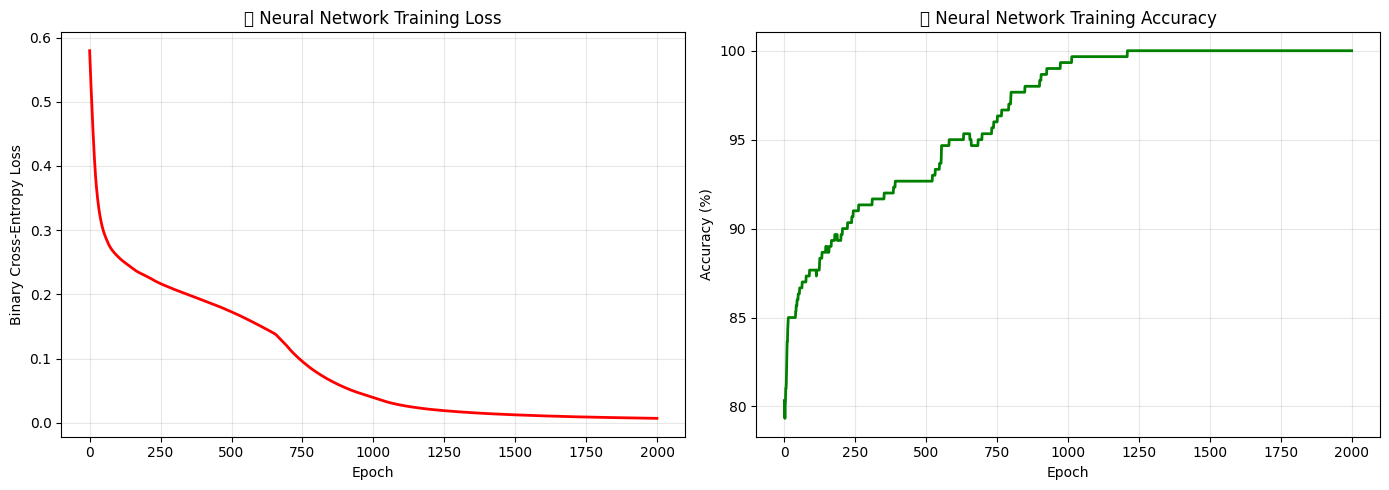

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
axes[0].plot(nn_model.losses, color='red', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Binary Cross-Entropy Loss')
axes[0].set_title('📉 Neural Network Training Loss')
axes[0].grid(True, alpha=0.3)

# Accuracy curve
axes[1].plot(nn_model.accuracies, color='green', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('📈 Neural Network Training Accuracy')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 1️⃣3️⃣ — Visualize Neural Network Decision Boundary

/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


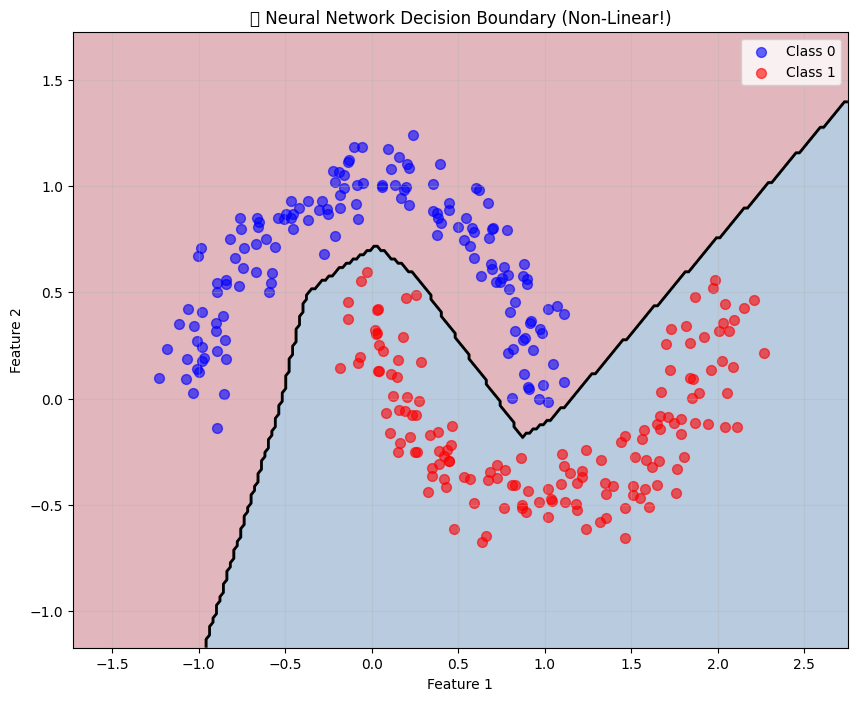

In [39]:
def plot_nn_decision_boundary(model, X, y, title):
    """Plot decision boundary for neural network"""
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
    plt.contour(xx, yy, Z, colors='black', linewidths=2, levels=[0.5])
    
    plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], 
                color='blue', label='Class 0', alpha=0.6, s=50)
    plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], 
                color='red', label='Class 1', alpha=0.6, s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_nn_decision_boundary(nn_model, X_moons, y_moons, 
                         "🎯 Neural Network Decision Boundary (Non-Linear!)")

### Step 1️⃣4️⃣ — Compare with Linear Model

In [40]:
# Compare performances
linear_accuracy = linear_model.compute_accuracy(linear_model.forward(X_moons), y_moons)
nn_accuracy = nn_model.accuracies[-1]

print("📊 MODEL COMPARISON ON MOONS DATASET")
print("=" * 50)
print(f"{'Model':<25} {'Accuracy':<15} {'Decision Boundary'}")
print("-" * 50)
print(f"{'Logistic Regression':<25} {linear_accuracy:<15.2f}% {'Linear ❌'}")
print(f"{'Neural Network':<25} {nn_accuracy:<15.2f}% {'Non-Linear ✅'}")
print("=" * 50)

📊 MODEL COMPARISON ON MOONS DATASET
Model                     Accuracy        Decision Boundary
--------------------------------------------------
Logistic Regression       86.67          % Linear ❌
Neural Network            100.00         % Non-Linear ✅


### Step 1️⃣5️⃣ — Test on Circles Dataset


🧪 Testing on Circles Dataset...
📊 Circles Dataset Results:
Linear Model Accuracy: 49.67%
Neural Network Accuracy: 99.67%


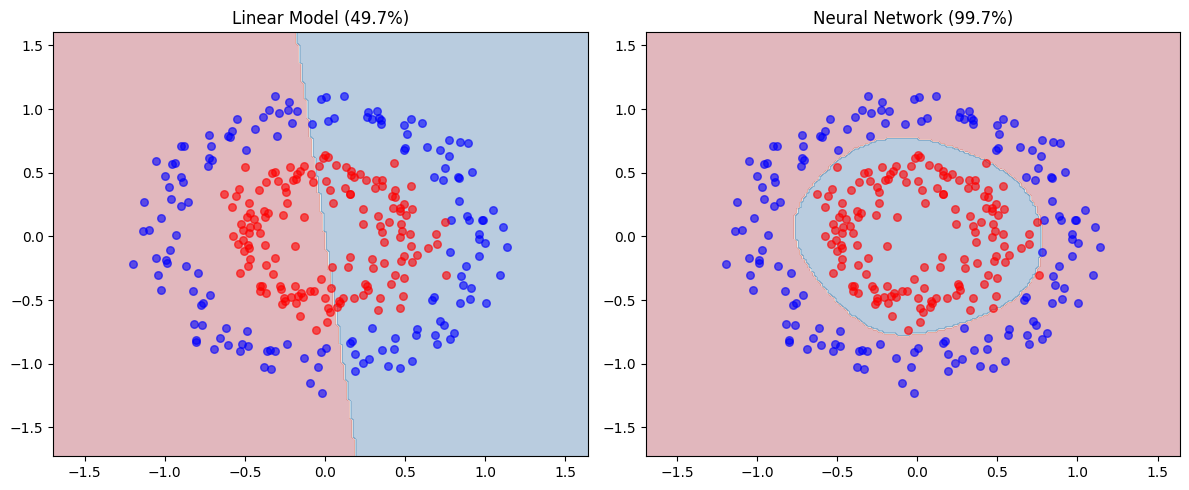

In [41]:
# Test on circles dataset
print("\n🧪 Testing on Circles Dataset...")

# Linear model (should fail)
linear_circles = LogisticRegression(n_features=2, lr=0.1)
linear_circles.fit(X_circles, y_circles, epochs=1000, verbose=False)
linear_circles_acc = linear_circles.compute_accuracy(linear_circles.forward(X_circles), y_circles)

# Neural network (should succeed)
nn_circles = NeuralNetwork(layer_sizes=[2, 20, 10, 1], activation='tanh', learning_rate=0.1)
nn_circles.fit(X_circles, y_circles, epochs=2000, verbose=False)
nn_circles_acc = nn_circles.accuracies[-1]

print(f"📊 Circles Dataset Results:")
print(f"Linear Model Accuracy: {linear_circles_acc:.2f}%")
print(f"Neural Network Accuracy: {nn_circles_acc:.2f}%")

# Visualize both
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ✅ Create meshgrid for decision boundary visualization
x_min, x_max = X_circles[:, 0].min() - 0.5, X_circles[:, 0].max() + 0.5
y_min, y_max = X_circles[:, 1].min() - 0.5, X_circles[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Linear model
Z_linear = linear_circles.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
axes[0].contourf(xx, yy, Z_linear, alpha=0.3, cmap='RdBu')
axes[0].scatter(X_circles[y_circles.flatten() == 0, 0], X_circles[y_circles.flatten() == 0, 1],
                color='blue', alpha=0.6, s=30)
axes[0].scatter(X_circles[y_circles.flatten() == 1, 0], X_circles[y_circles.flatten() == 1, 1],
                color='red', alpha=0.6, s=30)
axes[0].set_title(f'Linear Model ({linear_circles_acc:.1f}%)')

# Neural network
Z_nn = nn_circles.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
axes[1].contourf(xx, yy, Z_nn, alpha=0.3, cmap='RdBu')
axes[1].scatter(X_circles[y_circles.flatten() == 0, 0], X_circles[y_circles.flatten() == 0, 1],
                color='blue', alpha=0.6, s=30)
axes[1].scatter(X_circles[y_circles.flatten() == 1, 0], X_circles[y_circles.flatten() == 1, 1],
                color='red', alpha=0.6, s=30)
axes[1].set_title(f'Neural Network ({nn_circles_acc:.1f}%)')

plt.tight_layout()
plt.show()


### Step 1️⃣6️⃣ — Benchmark Against Scikit-Learn MLP

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# Sklearn MLP
print("🤖 Training scikit-learn MLPClassifier...")
start_time = time.time()

sklearn_mlp = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    activation='relu',
    learning_rate_init=0.1,
    max_iter=2000,
    random_state=42
)
sklearn_mlp.fit(X_moons, y_moons.ravel())

sklearn_time = time.time() - start_time
sklearn_pred = sklearn_mlp.predict(X_moons)
sklearn_acc = accuracy_score(y_moons, sklearn_pred) * 100

print(f"✅ Sklearn MLP training time: {sklearn_time:.4f} seconds")
print(f"✅ Sklearn MLP accuracy: {sklearn_acc:.2f}%")

# Our neural network
print("\nTraining our custom Neural Network...")
start_time = time.time()

our_nn = NeuralNetwork(layer_sizes=[2, 10, 5, 1], activation='relu', learning_rate=0.1)
our_nn.fit(X_moons, y_moons, epochs=2000, verbose=False)

our_time = time.time() - start_time
our_pred = our_nn.predict(X_moons)
our_acc = accuracy_score(y_moons, our_pred) * 100

print(f"✅ Our NN training time: {our_time:.4f} seconds")
print(f"✅ Our NN accuracy: {our_acc:.2f}%")

# Comparison
print("\n" + "=" * 60)
print("📊 NEURAL NETWORK BENCHMARK RESULTS")
print("=" * 60)
print(f"\n{'Metric':<25} {'Our NN':<15} {'Sklearn MLP':<15}")
print("-" * 60)
print(f"{'Training Time (s)':<25} {our_time:<15.4f} {sklearn_time:<15.4f}")
print(f"{'Final Accuracy (%)':<25} {our_acc:<15.2f} {sklearn_acc:<15.2f}")
print(f"{'Architecture':<25} {'2-10-5-1':<15} {'2-10-5-1':<15}")
print("=" * 60)

🤖 Training scikit-learn MLPClassifier...
✅ Sklearn MLP training time: 0.1659 seconds
✅ Sklearn MLP accuracy: 100.00%

Training our custom Neural Network...
✅ Our NN training time: 0.8846 seconds
✅ Our NN accuracy: 100.00%

📊 NEURAL NETWORK BENCHMARK RESULTS

Metric                    Our NN          Sklearn MLP    
------------------------------------------------------------
Training Time (s)         0.8846          0.1659         
Final Accuracy (%)        100.00          100.00         
Architecture              2-10-5-1        2-10-5-1       


## Part 3: Advanced Concepts and Applications

### Step 1️⃣7️⃣ — Multi-Class Neural Network

In [43]:
class MultiClassNeuralNetwork:
    def __init__(self, layer_sizes, activation='relu', learning_rate=0.01):
        """Neural network for multi-class classification"""
        self.layer_sizes = layer_sizes
        self.activation_name = activation
        self.lr = learning_rate
        self.losses = []
        self.accuracies = []
        
        # Initialize weights and biases
        self.weights = []
        self.biases = []
        
        for i in range(len(layer_sizes) - 1):
            if activation == 'relu':
                scale = np.sqrt(2.0 / layer_sizes[i])
            else:
                scale = np.sqrt(1.0 / layer_sizes[i])
                
            W = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * scale
            b = np.zeros((1, layer_sizes[i+1]))
            
            self.weights.append(W)
            self.biases.append(b)
    
    def softmax(self, z):
        """Softmax activation for output layer"""
        z_stable = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def forward(self, X):
        """Forward propagation"""
        self.activations = [X]
        self.z_values = []
        
        # Hidden layers
        for i in range(len(self.weights) - 1):
            z = self.activations[-1] @ self.weights[i] + self.biases[i]
            self.z_values.append(z)
            
            if self.activation_name == 'relu':
                a = relu(z)
            elif self.activation_name == 'tanh':
                a = tanh(z)
            elif self.activation_name == 'sigmoid':
                a = sigmoid(z)
                
            self.activations.append(a)
        
        # Output layer (softmax for multi-class)
        z_output = self.activations[-1] @ self.weights[-1] + self.biases[-1]
        self.z_values.append(z_output)
        output = self.softmax(z_output)
        self.activations.append(output)
        
        return output
    
    def compute_loss(self, y_pred, y_true):
        """Categorical cross-entropy loss"""
        if y_true.ndim == 1:
            y_true = np.eye(y_pred.shape[1])[y_true]
        
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    
    def compute_accuracy(self, y_pred, y_true):
        """Classification accuracy"""
        pred_classes = np.argmax(y_pred, axis=1)
        if y_true.ndim == 2:
            true_classes = np.argmax(y_true, axis=1)
        else:
            true_classes = y_true
        return np.mean(pred_classes == true_classes) * 100
    
    def backward(self, X, y_true):
        """Backward propagation for multi-class"""
        m = len(y_true)
        
        if y_true.ndim == 1:
            y_true = np.eye(self.weights[-1].shape[1])[y_true]
        
        dW = [np.zeros_like(W) for W in self.weights]
        db = [np.zeros_like(b) for b in self.biases]
        
        # Output layer gradient (softmax + cross-entropy has nice derivative)
        dZ_output = self.activations[-1] - y_true
        
        for l in range(len(self.weights) - 1, -1, -1):
            dW[l] = (1/m) * (self.activations[l].T @ dZ_output)
            db[l] = (1/m) * np.sum(dZ_output, axis=0, keepdims=True)
            
            if l > 0:
                dA_prev = dZ_output @ self.weights[l].T
                
                if self.activation_name == 'relu':
                    dZ_prev = dA_prev * relu_derivative(self.z_values[l-1])
                elif self.activation_name == 'tanh':
                    dZ_prev = dA_prev * tanh_derivative(self.z_values[l-1])
                elif self.activation_name == 'sigmoid':
                    dZ_prev = dA_prev * sigmoid_derivative(self.z_values[l-1])
                
                dZ_output = dZ_prev
        
        return dW, db
    
    def update_parameters(self, dW, db):
        """Update weights and biases"""
        for i in range(len(self.weights)):
            self.weights[i] -= self.lr * dW[i]
            self.biases[i] -= self.lr * db[i]
    
    def fit(self, X, y, epochs=1000, verbose=True):
        """Train the network"""
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y_pred, y)
            accuracy = self.compute_accuracy(y_pred, y)
            
            self.losses.append(loss)
            self.accuracies.append(accuracy)
            
            dW, db = self.backward(X, y)
            self.update_parameters(dW, db)
            
            if verbose and (epoch % 100 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch:4d} | Loss: {loss:.4f} | Accuracy: {accuracy:.2f}%")
    
    def predict(self, X):
        """Predict class labels"""
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)
    
    def predict_proba(self, X):
        """Predict class probabilities"""
        return self.forward(X)

### Step 1️⃣8️⃣ — Test Multi-Class Neural Network on Iris Dataset

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("🌸 Iris Dataset:")
print(f"Features: {iris.feature_names}")
print(f"Classes: {iris.target_names}")
print(f"Samples: {len(X_iris)}, Features: {X_iris.shape[1]}, Classes: {len(np.unique(y_iris))}")

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train multi-class neural network
print("\n🚀 Training Multi-Class Neural Network on Iris Dataset...")
multi_nn = MultiClassNeuralNetwork(
    layer_sizes=[4, 10, 8, 3],  # 4 inputs, 2 hidden layers, 3 outputs
    activation='relu', 
    learning_rate=0.01
)
multi_nn.fit(X_train_scaled, y_train, epochs=2000, verbose=True)

# Evaluate
y_pred = multi_nn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred) * 100

print(f"\n✅ Test Accuracy: {test_accuracy:.2f}%")

🌸 Iris Dataset:
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Samples: 150, Features: 4, Classes: 3

🚀 Training Multi-Class Neural Network on Iris Dataset...
Epoch    0 | Loss: 1.4922 | Accuracy: 13.33%
Epoch  100 | Loss: 0.4843 | Accuracy: 84.76%
Epoch  200 | Loss: 0.3687 | Accuracy: 88.57%
Epoch  300 | Loss: 0.3105 | Accuracy: 91.43%
Epoch  400 | Loss: 0.2703 | Accuracy: 92.38%
Epoch  500 | Loss: 0.2392 | Accuracy: 92.38%
Epoch  600 | Loss: 0.2127 | Accuracy: 93.33%
Epoch  700 | Loss: 0.1893 | Accuracy: 94.29%
Epoch  800 | Loss: 0.1683 | Accuracy: 95.24%
Epoch  900 | Loss: 0.1499 | Accuracy: 96.19%
Epoch 1000 | Loss: 0.1344 | Accuracy: 97.14%
Epoch 1100 | Loss: 0.1215 | Accuracy: 97.14%
Epoch 1200 | Loss: 0.1105 | Accuracy: 97.14%
Epoch 1300 | Loss: 0.1013 | Accuracy: 97.14%
Epoch 1400 | Loss: 0.0935 | Accuracy: 97.14%
Epoch 1500 | Loss: 0.0870 | Accuracy: 97.14%
Epoch 1600 | Loss: 0.0814 | Ac

### Step 1️⃣9️⃣ — Compare with Scikit-Learn Multi-Class MLP

In [45]:
# Sklearn multi-class MLP
print("🤖 Training scikit-learn MLP (multi-class)...")
sklearn_mlp_multi = MLPClassifier(
    hidden_layer_sizes=(10, 8),
    activation='relu',
    learning_rate_init=0.01,
    max_iter=2000,
    random_state=42
)
sklearn_mlp_multi.fit(X_train_scaled, y_train)

sklearn_pred_multi = sklearn_mlp_multi.predict(X_test_scaled)
sklearn_acc_multi = accuracy_score(y_test, sklearn_pred_multi) * 100

print(f"✅ Sklearn MLP Test Accuracy: {sklearn_acc_multi:.2f}%")

# Comparison
print("\n" + "=" * 50)
print("📊 MULTI-CLASS NEURAL NETWORK COMPARISON")
print("=" * 50)
print(f"{'Model':<30} {'Test Accuracy':<15}")
print("-" * 50)
print(f"{'Our Neural Network':<30} {test_accuracy:<15.2f}%")
print(f"{'Sklearn MLP':<30} {sklearn_acc_multi:<15.2f}%")
print("=" * 50)

🤖 Training scikit-learn MLP (multi-class)...
✅ Sklearn MLP Test Accuracy: 93.33%

📊 MULTI-CLASS NEURAL NETWORK COMPARISON
Model                          Test Accuracy  
--------------------------------------------------
Our Neural Network             95.56          %
Sklearn MLP                    93.33          %


### Step 2️⃣0️⃣ — Visualize Learning Curves

/tmp/ipykernel_919244/2290720327.py:21: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_919244/2290720327.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/silva/SILVA.AI/Projects/SAIR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


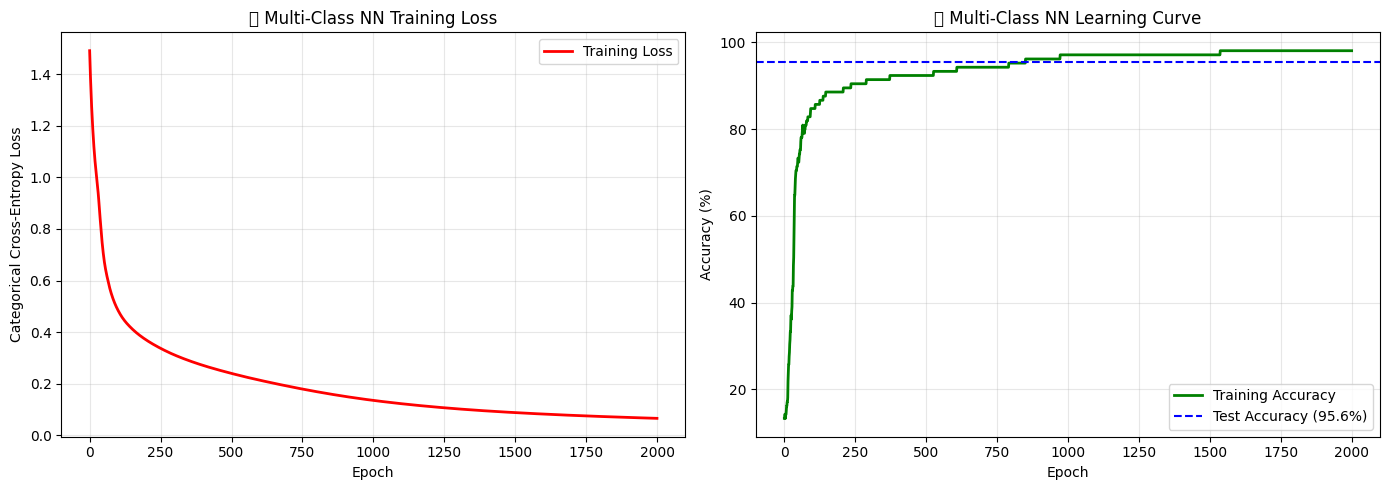

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
axes[0].plot(multi_nn.losses, color='red', linewidth=2, label='Training Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Categorical Cross-Entropy Loss')
axes[0].set_title('📉 Multi-Class NN Training Loss')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Accuracy curve
axes[1].plot(multi_nn.accuracies, color='green', linewidth=2, label='Training Accuracy')
axes[1].axhline(y=test_accuracy, color='blue', linestyle='--', 
               label=f'Test Accuracy ({test_accuracy:.1f}%)')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('📈 Multi-Class NN Learning Curve')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

## Part 4: Real-World Applications and Next Steps

### Step 2️⃣1️⃣ — When to Use Neural Networks

In [47]:
print("🎯 WHEN TO USE NEURAL NETWORKS:")
print("\n✅ Good use cases:")
print("• Complex non-linear patterns")
print("• Large datasets (thousands+ samples)")
print("• Image, audio, text data")
print("• Hierarchical feature learning needed")
print("• State-of-the-art performance required")

print("\n⚠️ When to consider simpler models:")
print("• Small datasets (< thousands of samples)")
print("• Tabular data with clear linear relationships")  
print("• Need for model interpretability")
print("• Limited computational resources")
print("• Quick prototyping")

print("\n📊 Model Selection Guide:")
print("Linear/Logistic Regression → Random Forest → Neural Networks")

🎯 WHEN TO USE NEURAL NETWORKS:

✅ Good use cases:
• Complex non-linear patterns
• Large datasets (thousands+ samples)
• Image, audio, text data
• Hierarchical feature learning needed
• State-of-the-art performance required

⚠️ When to consider simpler models:
• Small datasets (< thousands of samples)
• Tabular data with clear linear relationships
• Need for model interpretability
• Limited computational resources
• Quick prototyping

📊 Model Selection Guide:
Linear/Logistic Regression → Random Forest → Neural Networks


### Step 2️⃣2️⃣ — Common Architectures and Hyperparameters

In [48]:
# Common neural network architectures
architectures = {
    "Shallow Network": [10, 1],
    "Medium Network": [64, 32, 1], 
    "Deep Network": [128, 64, 32, 16, 1],
    "Wide & Shallow": [256, 1],
    "Narrow & Deep": [16, 16, 16, 16, 16, 1]
}

print("🏗️ COMMON NEURAL NETWORK ARCHITECTURES:")
for name, layers in architectures.items():
    print(f"• {name}: {layers}")

print("\n🎛️ KEY HYPERPARAMETERS:")
hyperparams = {
    "Learning Rate": "0.001-0.1 (most important!)",
    "Hidden Layers": "1-5 for MLPs",
    "Layer Sizes": "32-512 neurons per layer", 
    "Activation": "ReLU (hidden), Softmax/Sigmoid (output)",
    "Batch Size": "32-256",
    "Epochs": "Until validation loss stops improving"
}

for param, recommendation in hyperparams.items():
    print(f"• {param}: {recommendation}")

🏗️ COMMON NEURAL NETWORK ARCHITECTURES:
• Shallow Network: [10, 1]
• Medium Network: [64, 32, 1]
• Deep Network: [128, 64, 32, 16, 1]
• Wide & Shallow: [256, 1]
• Narrow & Deep: [16, 16, 16, 16, 16, 1]

🎛️ KEY HYPERPARAMETERS:
• Learning Rate: 0.001-0.1 (most important!)
• Hidden Layers: 1-5 for MLPs
• Layer Sizes: 32-512 neurons per layer
• Activation: ReLU (hidden), Softmax/Sigmoid (output)
• Batch Size: 32-256
• Epochs: Until validation loss stops improving


### Step 2️⃣3️⃣ — From Scratch to Production Frameworks

In [49]:
print("🚀 FROM SCRATCH TO PRODUCTION FRAMEWORKS:")
print("\n🧪 What we built from scratch:")
print("• Forward propagation")
print("• Backward propagation (backprop)")
print("• Activation functions and derivatives") 
print("• Weight initialization")
print("• Gradient descent optimization")

print("\n🏭 What production frameworks add:")
print("• Automatic differentiation (autograd)")
print("• GPU acceleration")
print("• Pre-built layers and architectures")
print("• Advanced optimizers (Adam, RMSprop)")
print("• Regularization techniques")
print("• Distributed training")
print("• Model deployment tools")

print("\n🔜 Next Steps:")
print("1. PyTorch/TensorFlow for real projects")
print("2. Convolutional Neural Networks (CNNs) for images")
print("3. Recurrent Neural Networks (RNNs) for sequences") 
print("4. Transformers for text and beyond!")
print("5. Reinforcement Learning")

🚀 FROM SCRATCH TO PRODUCTION FRAMEWORKS:

🧪 What we built from scratch:
• Forward propagation
• Backward propagation (backprop)
• Activation functions and derivatives
• Weight initialization
• Gradient descent optimization

🏭 What production frameworks add:
• Automatic differentiation (autograd)
• GPU acceleration
• Pre-built layers and architectures
• Advanced optimizers (Adam, RMSprop)
• Regularization techniques
• Distributed training
• Model deployment tools

🔜 Next Steps:
1. PyTorch/TensorFlow for real projects
2. Convolutional Neural Networks (CNNs) for images
3. Recurrent Neural Networks (RNNs) for sequences
4. Transformers for text and beyond!
5. Reinforcement Learning


## 🎯 Summary: Complete Deep Learning Foundation

In [50]:
# Create a summary visualization
summary_data = {
    "Model": ["Linear Regression", "Logistic Regression", "Softmax Regression", "Neural Network"],
    "Task": ["Regression", "Binary Classification", "Multi-Class Classification", "Complex Non-Linear"],
    "Activation": ["None", "Sigmoid", "Softmax", "ReLU/Tanh/Sigmoid"],
    "Layers": ["1", "1", "1", "2+"],
    "Parameters": ["Weights + Bias", "Weights + Bias", "Weights + Bias", "Multiple Weight Matrices + Biases"]
}

import pandas as pd
summary_df = pd.DataFrame(summary_data)
print("📚 MODEL EVOLUTION SUMMARY:")
print("=" * 80)
print(summary_df.to_string(index=False))
print("=" * 80)

📚 MODEL EVOLUTION SUMMARY:
              Model                       Task        Activation Layers                        Parameters
  Linear Regression                 Regression              None      1                    Weights + Bias
Logistic Regression      Binary Classification           Sigmoid      1                    Weights + Bias
 Softmax Regression Multi-Class Classification           Softmax      1                    Weights + Bias
     Neural Network         Complex Non-Linear ReLU/Tanh/Sigmoid     2+ Multiple Weight Matrices + Biases


### 🧠 Key Mathematical Insights:

1. **Universal Approximation Theorem**: A neural network with one hidden layer can approximate any continuous function given enough neurons
2. **Backpropagation**: Efficient gradient computation using chain rule
3. **Non-Linearity**: Activation functions enable learning complex patterns
4. **Hierarchical Features**: Each layer learns features at different abstraction levels

### 🚀 Path Forward:

This completes our foundation in **neural networks**:
- ✅ Understanding biological inspiration
- ✅ Implementing forward and backward propagation  
- ✅ Working with different activation functions
- ✅ Building both binary and multi-class networks
- ✅ Visualizing decision boundaries and learning curves

**Next up:** Convolutional Neural Networks (CNNs) for image data!

---

*"Neural networks are function approximators that can learn any pattern given enough data and compute."*

## 🧠 Practice & Reflection — Neural Networks from Scratch

Congratulations 🎉 — you have successfully built neural networks from scratch, understood the mathematics of backpropagation, and seen how they can learn complex non-linear patterns!

---

### 📌 **Part 1 — Core Concepts**

1. **Explain in your own words:**
   - Why do we need activation functions in neural networks?
   - What is the "vanishing gradient" problem and how does ReLU help?
   - How does backpropagation use the chain rule?
   - What's the difference between a single neuron and a neural network?
   - Why can neural networks learn non-linear patterns while linear models can't?

2. **Activation functions:**
   - When would you use ReLU vs Tanh vs Sigmoid?
   - Compute ReLU(2), ReLU(-2), Tanh(1), Sigmoid(0)
   - Why do we use softmax for multi-class output and sigmoid for binary?
   - What happens if we use linear activation in hidden layers?

---

### 📌 **Part 2 — Mathematical Understanding**

3. **Forward propagation:**
   - Given input [1, 2], weights [[0.5, -0.5], [0.3, 0.7]], bias [0.1, -0.1], compute the output with ReLU activation
   - Show the matrix dimensions at each layer for a 3-layer network

4. **Backpropagation:**
   - Derive the gradient for a simple 2-layer network step by step
   - Why is the gradient for softmax + cross-entropy so elegant?
   - How does weight initialization affect training?

---

### 📌 **Part 3 — Implementation Challenges**

5. **Architecture experiments:**
   - Try different architectures on moons dataset: [2,5,1], [2,10,5,1], [2,20,10,5,1]
   - Compare training time, final accuracy, and decision boundaries
   - Which works best and why?

6. **Activation function comparison:**
   - Train the same architecture with ReLU, Tanh, and Sigmoid
   - Plot loss curves for each
   - Discuss convergence speed and final performance

7. **Learning rate experiments:**
   - Try learning rates: 0.001, 0.01, 0.1, 1.0
   - Observe training stability and convergence
   - Identify signs of too high/too low learning rates

---

### 📌 **Part 4 — Advanced Applications**

8. **Regularization:**
   - Add L2 regularization to your neural network
   - Experiment with different regularization strengths
   - Observe effects on training vs test performance

9. **Weight visualization:**
   - Extract and visualize weights from different layers
   - Compare weights before and after training
   - What patterns do you notice?

10. **Custom dataset:**
    - Create your own non-linear classification dataset
    - Train both linear and neural network models
    - Compare performance and decision boundaries

---

## ✅ **Goal of These Exercises**

By completing these challenges, you will:

- ✅ Master the mathematics of neural networks and backpropagation
- ✅ Understand how architecture choices affect model performance  
- ✅ Build intuition for hyperparameter tuning
- ✅ Gain confidence in implementing complex ML algorithms from scratch
- ✅ Learn to diagnose and fix common training problems
- ✅ Prepare for more advanced architectures (CNNs, RNNs, Transformers)

---

## 🎓 Next Steps

In **Lecture 6**, we'll dive into **Convolutional Neural Networks (CNNs)** for image data!

---

## 🙏 Conclusion

You've now built **four fundamental ML algorithms from scratch**:
1. ✅ Linear Regression (Lecture 1)
2. ✅ Binary Logistic Regression (Lecture 4)  
3. ✅ Multi-Class Softmax Regression (Lecture 4)
4. ✅ Neural Networks (This lecture)

You understand:
- How gradient descent optimizes complex models
- The role of activation functions and non-linearity
- How backpropagation efficiently computes gradients
- How to implement, visualize, and benchmark neural networks
- The mathematical foundations of deep learning

**This is the core of modern deep learning!**

All advanced architectures (CNNs, RNNs, Transformers) build upon these fundamental concepts.

Keep practicing, keep building, and keep learning! 🚀

In [25]:
# Final inspirational message
print("\n" + "✨" * 50)
print("🎉 CONGRATULATIONS! You've built neural networks from scratch!")
print("💪 You now understand the fundamentals of deep learning")
print("🚀 Ready to tackle CNNs, RNNs, and beyond!")
print("✨" * 50)


✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
🎉 CONGRATULATIONS! You've built neural networks from scratch!
💪 You now understand the fundamentals of deep learning
🚀 Ready to tackle CNNs, RNNs, and beyond!
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
